





# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =url + "&q=" + city
  
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | leirvik
Processing Record 2 of Set 1 | anadyr
Processing Record 3 of Set 1 | port mathurin
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | aasiaat
Processing Record 6 of Set 1 | bytca
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | auki
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | whitehorse
Processing Record 13 of Set 1 | stanley
Processing Record 14 of Set 1 | nishinoomote
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | opuwo
Processing Record 17 of Set 1 | gadzhiyevo
Processing Record 18 of Set 1 | vilyuysk
Processing Record 19 of Set 1 | susuman
Processing Record 20 of Set 1 | broome
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | hawaiian paradise park
Processing Reco

Processing Record 39 of Set 4 | qoryooley
Processing Record 40 of Set 4 | hillsborough
Processing Record 41 of Set 4 | ust-nera
Processing Record 42 of Set 4 | tralee
Processing Record 43 of Set 4 | olonkinbyen
Processing Record 44 of Set 4 | road town
Processing Record 45 of Set 4 | roma
Processing Record 46 of Set 4 | grand gaube
Processing Record 47 of Set 4 | yuzhno-kurilsk
Processing Record 48 of Set 4 | san rafael
Processing Record 49 of Set 4 | jizzax
Processing Record 0 of Set 5 | walvis bay
Processing Record 1 of Set 5 | kantemirovka
Processing Record 2 of Set 5 | nagqu
Processing Record 3 of Set 5 | magadan
Processing Record 4 of Set 5 | tazovsky
Processing Record 5 of Set 5 | san luis de la loma
Processing Record 6 of Set 5 | jumelles
Processing Record 7 of Set 5 | bomdila
Processing Record 8 of Set 5 | sambava
Processing Record 9 of Set 5 | igarka
Processing Record 10 of Set 5 | kill devil hills
Processing Record 11 of Set 5 | udachny
Processing Record 12 of Set 5 | maumere

Processing Record 33 of Set 8 | antonio enes
Processing Record 34 of Set 8 | lagunas
Processing Record 35 of Set 8 | flin flon
Processing Record 36 of Set 8 | vanimo
Processing Record 37 of Set 8 | zunyi
Processing Record 38 of Set 8 | queenstown
Processing Record 39 of Set 8 | soto la marina
Processing Record 40 of Set 8 | trinidad
Processing Record 41 of Set 8 | pitkyaranta
Processing Record 42 of Set 8 | haciqabul
Processing Record 43 of Set 8 | karratha
Processing Record 44 of Set 8 | baiyin
Processing Record 45 of Set 8 | peniche
Processing Record 46 of Set 8 | paita
Processing Record 47 of Set 8 | abraham's bay
City not found. Skipping...
Processing Record 48 of Set 8 | cidreira
Processing Record 49 of Set 8 | san jose village
City not found. Skipping...
Processing Record 0 of Set 9 | raufoss
Processing Record 1 of Set 9 | golyshmanovo
Processing Record 2 of Set 9 | karakecili
Processing Record 3 of Set 9 | murghob
Processing Record 4 of Set 9 | letlhakane
Processing Record 5 of 

Processing Record 26 of Set 12 | sereflikochisar
Processing Record 27 of Set 12 | sisak
Processing Record 28 of Set 12 | san sebastian de la gomera
Processing Record 29 of Set 12 | daye
Processing Record 30 of Set 12 | colonia
Processing Record 31 of Set 12 | ronneby
Processing Record 32 of Set 12 | dhemaji
Processing Record 33 of Set 12 | pinsk
Processing Record 34 of Set 12 | hankasalmi
Processing Record 35 of Set 12 | sorong
Processing Record 36 of Set 12 | chegdomyn
Processing Record 37 of Set 12 | gandajika
Processing Record 38 of Set 12 | sao raimundo nonato
Processing Record 39 of Set 12 | preobrazheniye
Processing Record 40 of Set 12 | mejit
Processing Record 41 of Set 12 | petauke
Processing Record 42 of Set 12 | todos santos
Processing Record 43 of Set 12 | ust'-kut
Processing Record 44 of Set 12 | narasannapeta
Processing Record 45 of Set 12 | pearsall
Processing Record 46 of Set 12 | carnarvon
Processing Record 47 of Set 12 | galveston
Processing Record 48 of Set 12 | broke

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,leirvik,59.7798,5.5005,17.02,86,52,3.93,NO,1691962365
1,anadyr,64.7500,177.4833,14.28,66,0,7.60,RU,1691962365
2,port mathurin,-19.6833,63.4167,22.68,72,22,10.64,MU,1691962365
3,adamstown,-25.0660,-130.1015,18.51,58,31,2.83,PN,1691962365
4,aasiaat,68.7098,-52.8699,3.77,95,98,1.09,GL,1691962366


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,leirvik,59.7798,5.5005,17.02,86,52,3.93,NO,1691962365
1,anadyr,64.7500,177.4833,14.28,66,0,7.60,RU,1691962365
2,port mathurin,-19.6833,63.4167,22.68,72,22,10.64,MU,1691962365
3,adamstown,-25.0660,-130.1015,18.51,58,31,2.83,PN,1691962365
4,aasiaat,68.7098,-52.8699,3.77,95,98,1.09,GL,1691962366


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

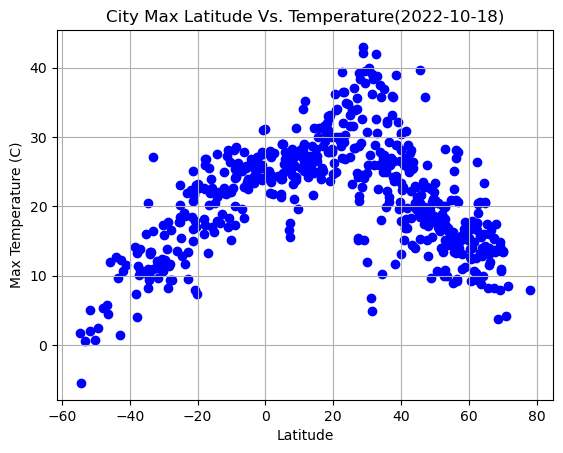

In [18]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, color="blue", marker="o" )


# Incorporate the other graph properties
plt.title("City Max Latitude Vs. Temperature(2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

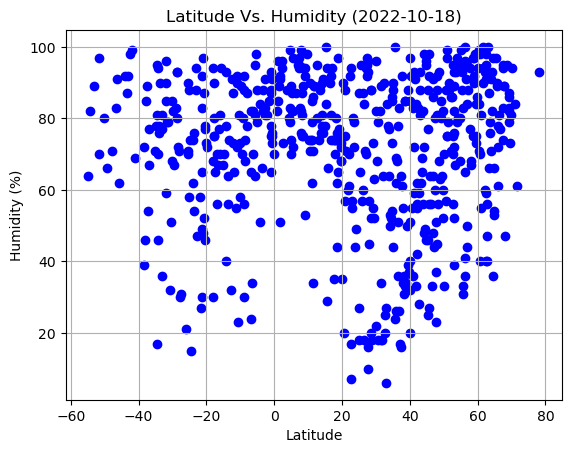

In [19]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, color="blue", marker="o" )

# Incorporate the other graph properties
plt.title("Latitude Vs. Humidity (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

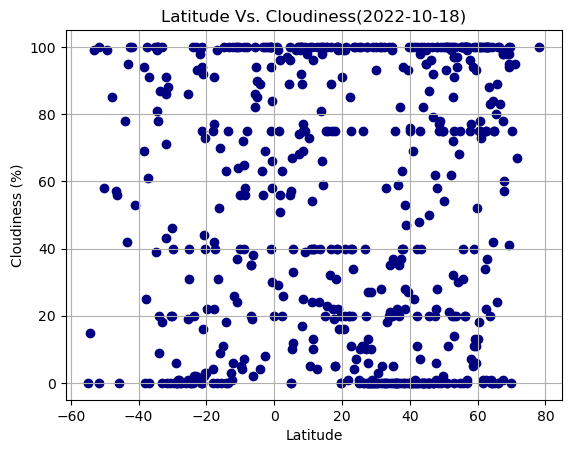

In [27]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, color="Navy", marker="o")


# Incorporate the other graph properties
plt.title("Latitude Vs. Cloudiness(2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

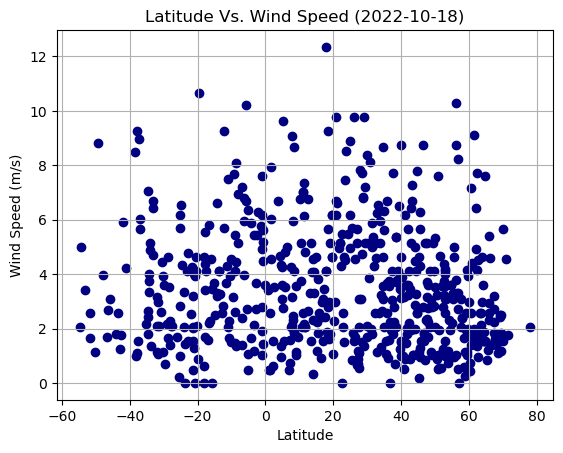

In [29]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, color="Navy", marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs. Wind Speed (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [105]:
# Define a function to create Linear Regression plots
def  linear_regression (x_values, y_values):
    # Define  slope             
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-value is: {rvalue**2}")

In [81]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[city_data_df['Lat']>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,leirvik,59.7798,5.5005,17.02,86,52,3.93,NO,1691962365
1,anadyr,64.7500,177.4833,14.28,66,0,7.60,RU,1691962365
4,aasiaat,68.7098,-52.8699,3.77,95,98,1.09,GL,1691962366
5,bytca,49.2240,18.5588,20.58,85,0,1.03,SK,1691962366
6,bethel,41.3712,-73.4140,30.86,59,0,3.60,US,1691962366


In [66]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[city_data_df['Lat']<=0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port mathurin,-19.6833,63.4167,22.68,72,22,10.64,MU,1691962365
3,adamstown,-25.0660,-130.1015,18.51,58,31,2.83,PN,1691962365
7,puerto natales,-51.7236,-72.4875,2.07,97,100,1.66,CL,1691962366
8,auki,-8.7676,160.7034,24.33,92,100,4.46,SB,1691962366
9,margaret river,-33.9500,115.0667,13.19,78,9,4.90,AU,1691962147


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.38782819981651573


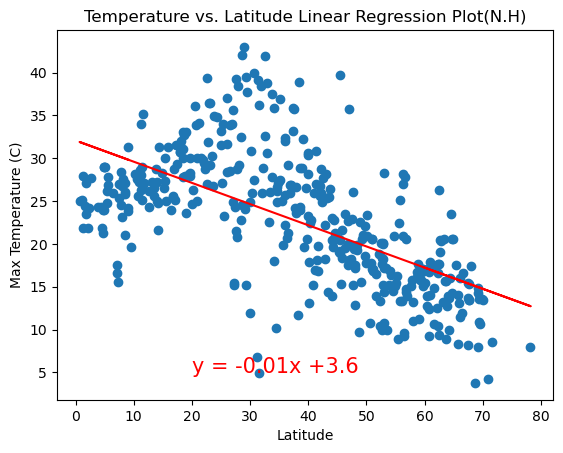

In [92]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values =northern_hemi_df['Max Temp']
plt.scatter(x_values, y_values, marker="o",)
# Incorporate the other graph properties
plt.title("Temperature vs. Latitude Linear Regression Plot(N.H)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Add regression line using defined function
linear_regression (x_values, y_values)

# Show plot
plt.show()

The r-value is: 0.7377078957880038


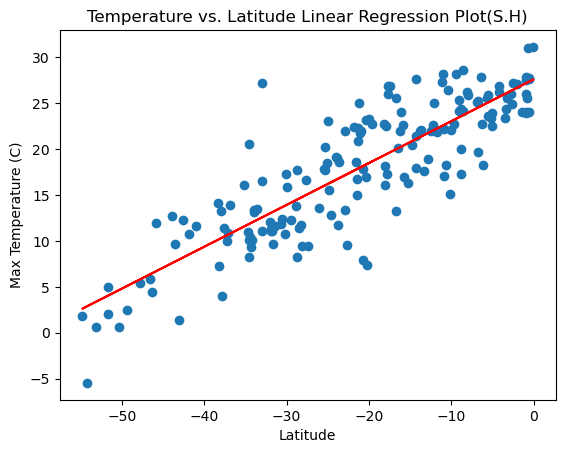

In [106]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values =southern_hemi_df['Max Temp']
plt.scatter(x_values, y_values, marker="o",)
# Incorporate the other graph properties
plt.title("Temperature vs. Latitude Linear Regression Plot(S.H)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Add regression line using defined function
linear_regression (x_values, y_values)

# Show plot
plt.show()

**Discussion about the linear relationship:** For the Nothern Hemisphere, we can see there is no high correlation between  Latitude and temperature due to low r value. This suggest that other factors needs to be include to explain how x is correlated it y. However there is a higher correlation in the Southern Hemisphere plot, about 70% of y is explained by x. There is about 30% of uncertainity for y. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 1.1784251020662297e-07


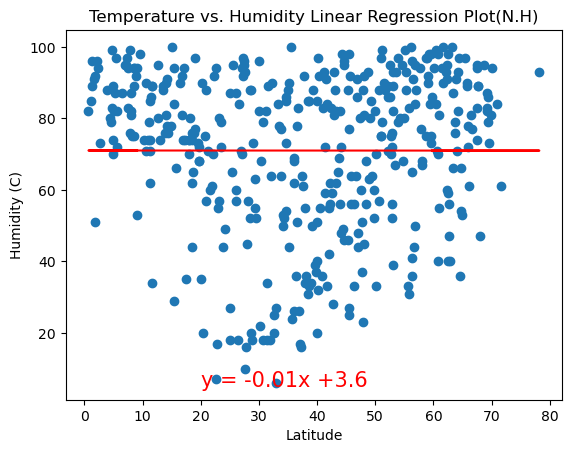

In [94]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values =northern_hemi_df['Humidity']
plt.scatter(x_values, y_values, marker="o",)
# Incorporate the other graph properties
plt.title("Temperature vs. Humidity Linear Regression Plot(N.H)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (C)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Add regression line using defined function
linear_regression (x_values, y_values)

# Show plot
plt.show()

The r-value is: 1.7531529123912338e-06


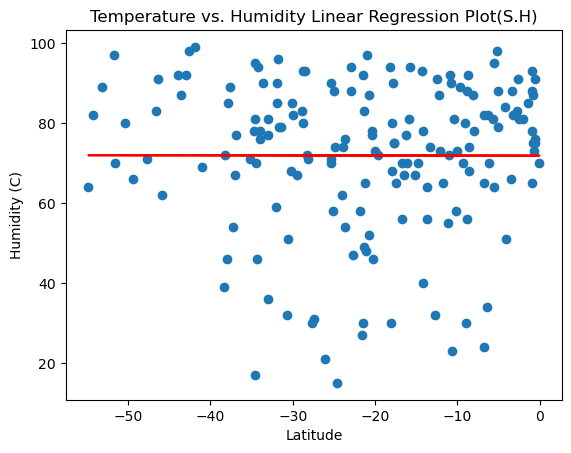

In [103]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.scatter(x_values, y_values, marker="o",)
# Incorporate the other graph properties
plt.title("Temperature vs. Humidity Linear Regression Plot(S.H)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (C)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Add regression line using defined function
linear_regression (x_values, y_values)

# Show plot
plt.show()

**Discussion about the linear relationship:** Both hemisphere, there is a high correlation between humidity and Latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0033462178787722666


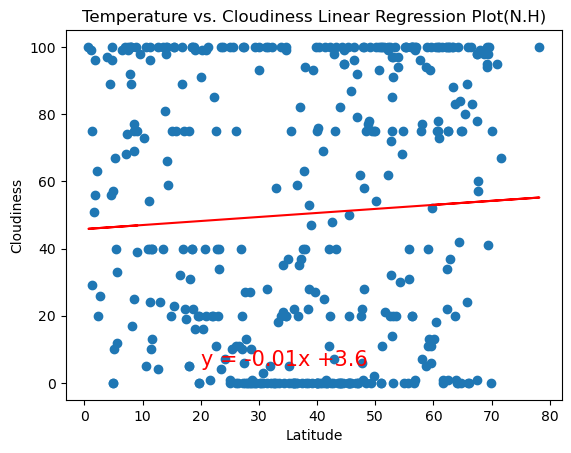

In [101]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values =northern_hemi_df['Cloudiness']
plt.scatter(x_values, y_values, marker="o",)
# Incorporate the other graph properties
plt.title("Temperature vs. Cloudiness Linear Regression Plot(N.H)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Add regression line using defined function
linear_regression (x_values, y_values)

# Show plot
plt.show()

The r-value is: 0.004328843719158419


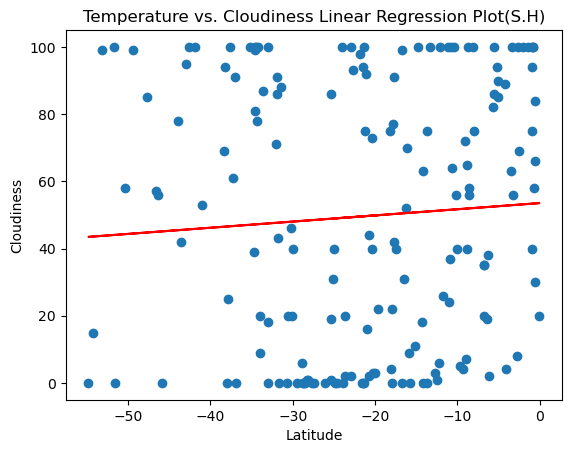

In [104]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.scatter(x_values, y_values, marker="o",)
# Incorporate the other graph properties
plt.title("Temperature vs. Cloudiness Linear Regression Plot(S.H)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Add regression line using defined function
linear_regression (x_values, y_values)

# Show plot
plt.show()

**Discussion about the linear relationship:** Both hemisphere, there is a low  correlation between cloudiness and Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03366506804024366


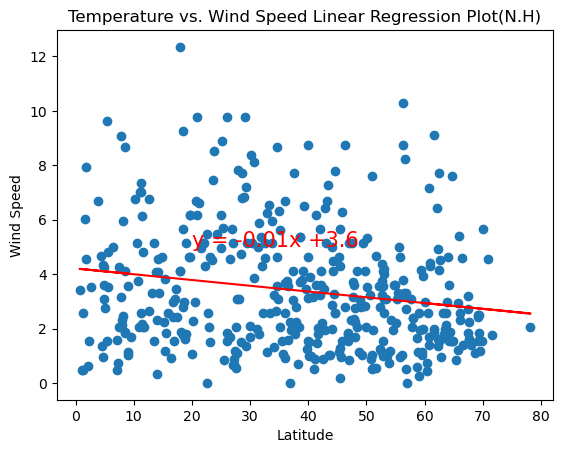

In [98]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values =northern_hemi_df['Wind Speed']
plt.scatter(x_values, y_values, marker="o",)
# Incorporate the other graph properties
plt.title("Temperature vs. Wind Speed Linear Regression Plot(N.H)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Add regression line using defined function
linear_regression (x_values, y_values)

# Show plot
plt.show()

The r-value is: 0.03366506804024366


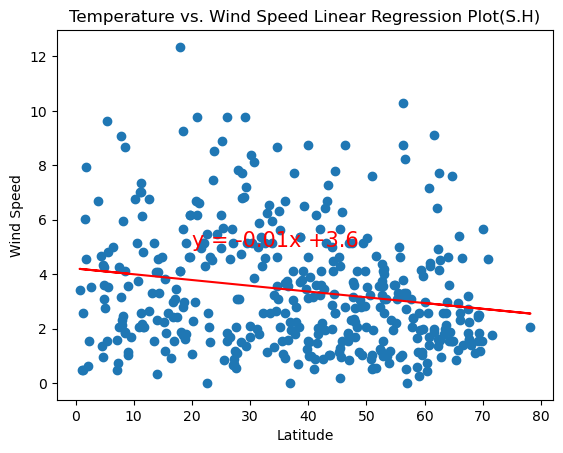

In [99]:
# Southern Hemisphere
x_values = northern_hemi_df['Lat']
y_values =northern_hemi_df['Wind Speed']
plt.scatter(x_values, y_values, marker="o",)
# Incorporate the other graph properties
plt.title("Temperature vs. Wind Speed Linear Regression Plot(S.H)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Add regression line using defined function
linear_regression (x_values, y_values)

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
Both hemisphere, there is a low correlation between wind speed and Latitude. Other factors need to be include to better explain y. 